# TP 5 
# SVM linéaires
 **EBNOU Mohamed Nedhir - ELHIANI Youssef**

# Introduction

Les machines à vecteurs de support (SVM : Support Vector Machines) sont une classe de méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.

Les avantages des SVM :
-  Très efficaces en dimension élevée.
-  Ils sont aussi efficaces dans le cas où la dimension de l’espace est plus grande que le
nombre d’échantillons d’apprentissage.
-  Pour la décision, n’utilisent pas tous les échantillons d’apprentissage, mais seulement une partie (les vecteurs de support). En conséquence, ces algorithmes demandent moins de mémoire.

Désavantages :
-  Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les performances sont moins bonnes.
-  Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas d’estimations de probabilités.

# Jeu de données Iris

Nous utilisons le jeu de données Iris, nous n'utiliserons que les deux premiers attributs (longueur et largeur des sépales).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
# Chargement des données
iris = datasets.load_iris()

Pour commencer, nous ne conservons que les deux premiers attributs du jeu de données :

In [32]:
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Nous pouvons maintenant entraîner une machine à vecteur de support linéaire :

In [3]:
C = 1.0 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)

/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

# Question
Calculez le score d’échantillons bien classifiés sur le jeu de données de test.

**Réponse :**

In [4]:
y_pred = lin_svc.predict(X_test)

# le calcul de l'accuracy
sum(y_pred == y_test)/len(y_pred)


0.6

In [5]:
# Autre méthode 
lin_svc.score(X_test, y_test)

0.6

Visualisons maintenant la surface de décision apprise par notre modèle :

Text(0.5, 1.0, 'LinearSVC')

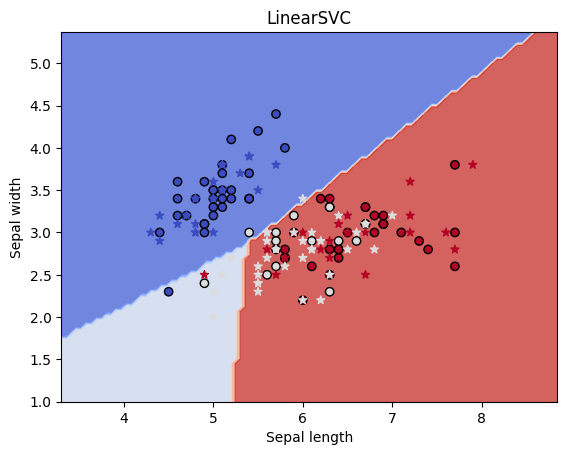

In [6]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

## Question :
Testez différentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?

**Réponse :**

### C = 10

/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'LinearSVC')

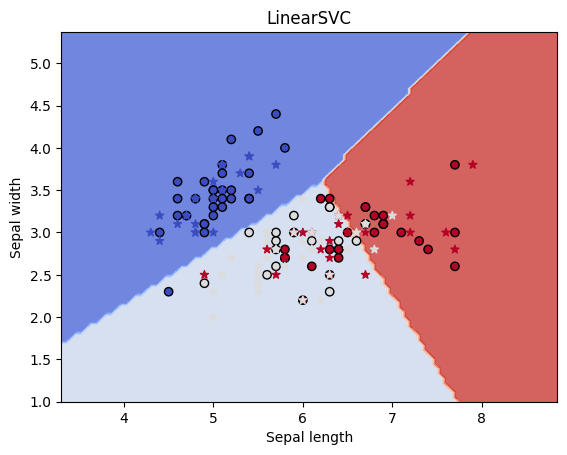

In [14]:
C = 10 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)

# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.title("LinearSVC")

### C = 50

/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'LinearSVC')

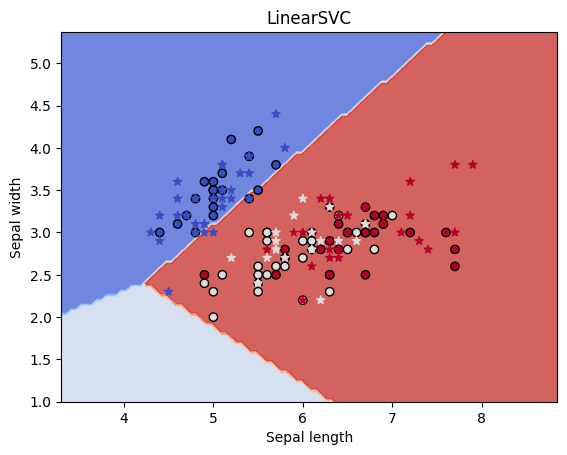

In [33]:
C = 50 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)

# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.title("LinearSVC")

### C = 100

/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0.5, 1.0, 'LinearSVC')

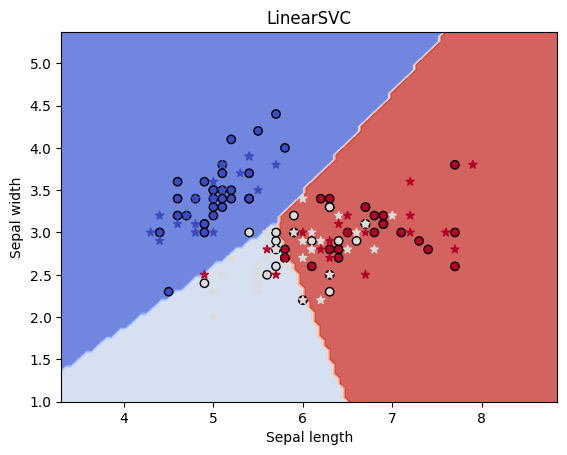

In [17]:
C = 100

lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)

# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

**Conclusion**   :

Lorsque C augmente, la frontière de décision est plus définie et sépare mieux les classes, les échantillons étant également mieux classifiés.

## Question
D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?

**Réponse** : D'après la visualisation ci-dessus, ce modèle de SVM linéaire n'est pas du tout adapté au problème car il arrive pas à séparer les zones de frontières pour aboutir à une 
bonne classification des données de test et ceci parce que nos données ne sont pas tous linéairement séparables.

Les modèles linéaires LinearSVC() et SVC(kernel='linear'), comme nous l’avons déjà dit, produisent des résultats légèrement différents à cause du fait qu’ils optimisent des fonctions de coût différentes mais aussi à cause du fait qu’ils gèrent les problèmes multi-classe de manière différente (linearSVC utilise One-vs-All et SVC utilise One-vs-One).

/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


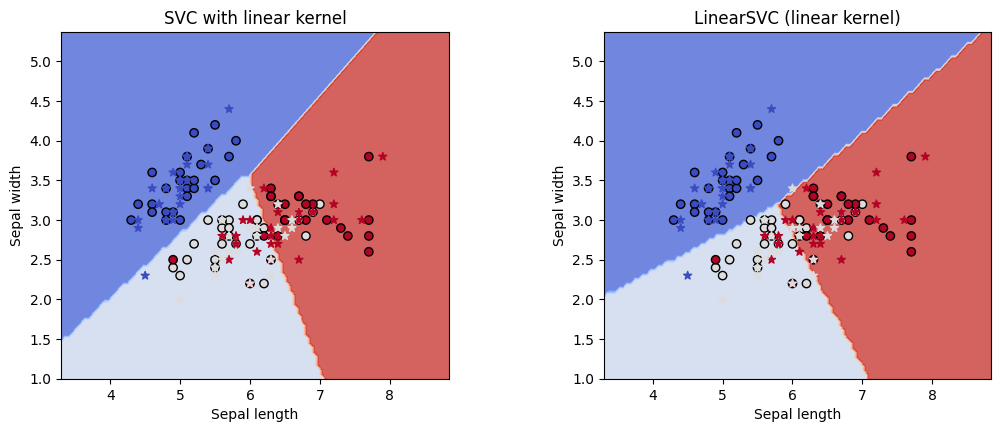

In [8]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']
fig = plt.figure(figsize=(12, 4.5))
for i, clf in enumerate((svc, lin_svc)): 
    plt.subplot(1, 2, i + 1) 
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k',c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*',c=y_test, cmap=plt.cm.coolwarm) 
    plt.xlabel('Sepal length') 
    plt.ylabel('Sepal width') 
    plt.title(titles[i])
plt.show()


## Question
Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Iris. Le score de classification en test a-t-il augmenté ? Pourquoi ?

**Réponse** 

In [46]:
X, y = iris.data[:, :4], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [47]:
C = 1.0 # paramètre de régularisation 
lin_svc = svm.LinearSVC(C=C) 
lin_svc.fit(X_train, y_train)

/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [48]:
# Autre méthode 
lin_svc.score(X_test, y_test)

0.96

**Conclusion**   :
Avec plus de variables explicatives (4 vs 2) le modèle arrive à obtenir un meilleur score (0.96 > 0.6). 


# Jeu de données Digits

In [21]:
from sklearn.datasets import load_digits 
digits = load_digits()
X, y = digits.data, digits.target

## Question :
Utilisez les données Digits pour construire un classifieur LinearSVC et évaluez-le. Si le temps d’apprentissage est trop long, sélectionnez une partie plus petite de la base d’apprentissage (par exemple 10000 échantillons). Pour quelle valeur de C on obtient le meilleurs résultats de généralisation ?

**Réponse** 

/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/itsnedhir/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/its

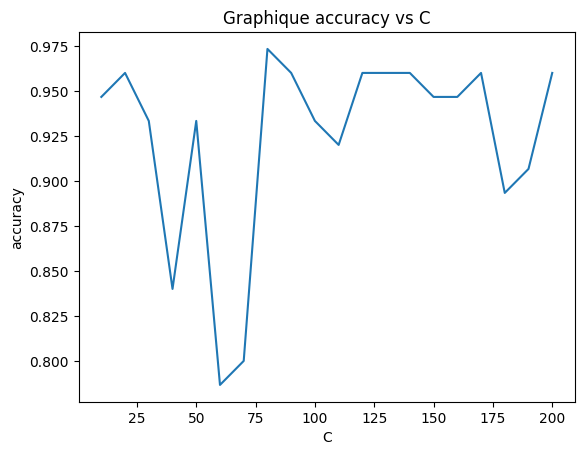

In [49]:
C = 10 # paramètre de régularisation 

accuracy_list = []
for idx in range(0, 20):

    C = 10*(idx + 1)
    lin_svc = svm.LinearSVC(C=C) 
    lin_svc.fit(X_train, y_train)
    accuracy_list.append(lin_svc.score(X_test, y_test))
plt.plot([10*(idx+1) for idx in range(20)], accuracy_list)
plt.title("Graphique accuracy vs C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.show()

**Conclusion**

On obtient le meilleurs résultats de généralisation pour les valeurs de $C \geq 75$

# Conslusion 

Les résultats de classification SVM obtenus peuvent être améliorés en optimisant les paramètres suivants :
- Les paramètres C et gamma
- Le nombre de variables explicatives
- Le nombre d'échantillons 

Pour résoudre le problème des classes difficilement séparables, on peut augmenter le nombre d'exemples.

Link to Github repository : https://github.com/itsnedhir/App.-Profond